In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lxml import etree
import os

In [7]:
# Function to parse XML and convert to DataFrame
def parse_xml_to_df(xml_file, desired_tags):
    tree = etree.parse(xml_file)
    root = tree.getroot()
    all_records = []
    for child in root:
        record = {}
        for tag in desired_tags:
            record[tag] = child.get(tag)
        all_records.append(record)
    return pd.DataFrame(all_records)

Correlation matrix:
               ViewCount  Interactions  PostLength  TitleLength
ViewCount      1.000000      0.072720   -0.038966    -0.017745
Interactions   0.072720      1.000000    0.178784     0.049363
PostLength    -0.038966      0.178784    1.000000     0.201939
TitleLength   -0.017745      0.049363    0.201939     1.000000


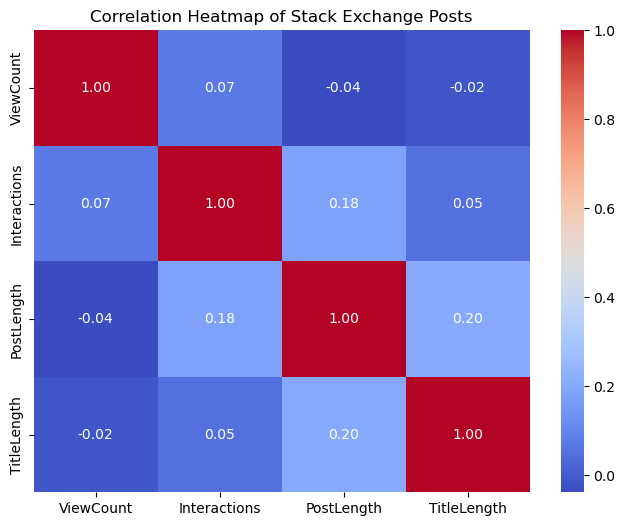

In [9]:
# Define the path to your XML files
posts_file_path = 'Posts.xml'  # Update the path if needed

# Define the tags you're interested in for the Posts file
post_tags = ['Id', 'ViewCount', 'Body', 'Title', 'AnswerCount', 'CommentCount', 'FavoriteCount']

# Parse the XML file and create a DataFrame for Posts
posts_df = parse_xml_to_df(posts_file_path, post_tags)

# Convert numeric columns to appropriate data types for Posts
numeric_columns = ['ViewCount', 'AnswerCount', 'CommentCount', 'FavoriteCount']
posts_df[numeric_columns] = posts_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Interactions will be the sum of AnswerCount, CommentCount, and FavoriteCount
posts_df['Interactions'] = posts_df['AnswerCount'] + posts_df['CommentCount'] + posts_df['FavoriteCount']

# Calculate post length as the length of the Body
posts_df['PostLength'] = posts_df['Body'].str.len()

# Calculate title length as the length of the Title
posts_df['TitleLength'] = posts_df['Title'].str.len()

# Drop rows with missing data that are essential for correlation analysis
posts_df.dropna(subset=['ViewCount', 'Interactions', 'PostLength', 'TitleLength'], inplace=True)

# Calculate correlations
correlations = posts_df[['ViewCount', 'Interactions', 'PostLength', 'TitleLength']].corr()

# Display the correlation matrix
print("Correlation matrix:\n", correlations)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Stack Exchange Posts')
plt.show()

Correlation between views and interactions: 0.073
Correlation between views and post length: -0.039
Correlation between title length and interactions: 0.049


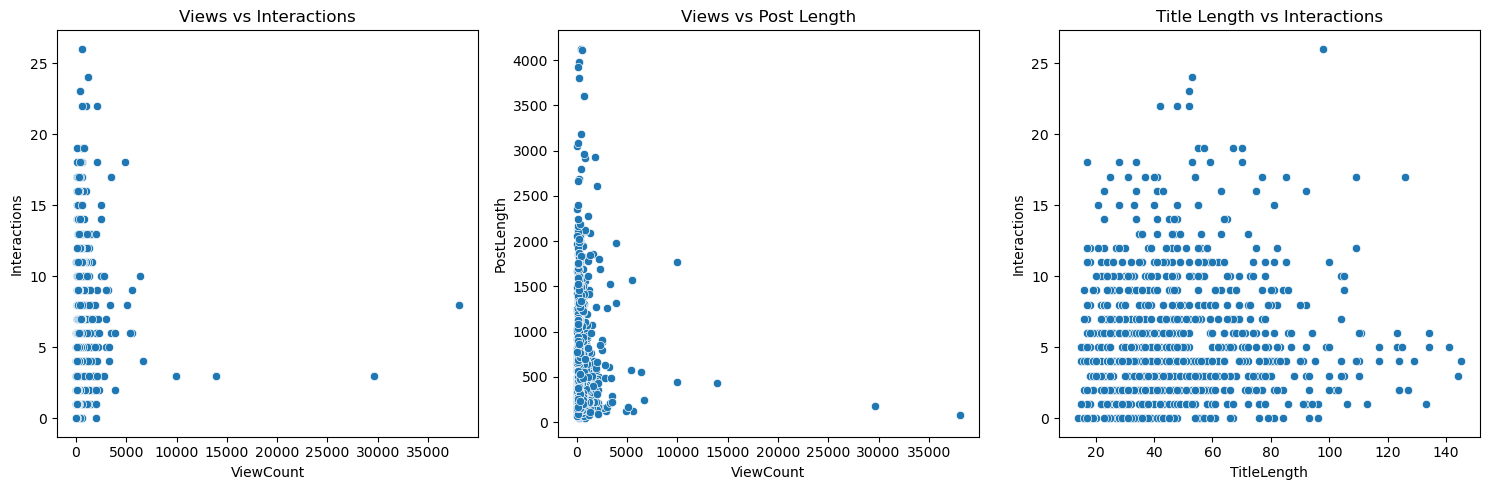

In [12]:
# Continuing from the previous code where we parsed the Posts.xml file and added necessary columns:

# Calculate individual correlations
views_to_interactions_corr = posts_df['ViewCount'].corr(posts_df['Interactions'])
views_to_post_length_corr = posts_df['ViewCount'].corr(posts_df['PostLength'])
title_length_to_interactions_corr = posts_df['TitleLength'].corr(posts_df['Interactions'])

# Display individual correlations
print(f"Correlation between views and interactions: {views_to_interactions_corr:.3f}")
print(f"Correlation between views and post length: {views_to_post_length_corr:.3f}")
print(f"Correlation between title length and interactions: {title_length_to_interactions_corr:.3f}")

# Create scatter plots for visualizing individual correlations
plt.figure(figsize=(15, 5))

# Views to Interactions
plt.subplot(1, 3, 1)
sns.scatterplot(x=posts_df['ViewCount'], y=posts_df['Interactions'])
plt.title('Views vs Interactions')

# Views to Post Length
plt.subplot(1, 3, 2)
sns.scatterplot(x=posts_df['ViewCount'], y=posts_df['PostLength'])
plt.title('Views vs Post Length')

# Title Length vs Interactions
plt.subplot(1, 3, 3)
sns.scatterplot(x=posts_df['TitleLength'], y=posts_df['Interactions'])
plt.title('Title Length vs Interactions')

plt.tight_layout()
plt.show()
